In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=400)
import anndata
import mplscience
import os

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1
plt.rcParams['figure.dpi'] = 250


['default', 'despine']


In [2]:
fig_output_dir = "/lustre/groups/ml01/workspace/ot_perturbation/figures/multiome"

In [3]:
source_col = "#8f97a8"
target_col = "#1099c7" 


In [4]:
adata_rna_test = sc.read_h5ad("/lustre/groups/ml01/workspace/ot_perturbation/data/multiome/GLI3_KO_multiome_18d_adata_src_test_processed_with_scvi.h5ad")
adata_atac_test = sc.read_h5ad("/lustre/groups/ml01/workspace/ot_perturbation/data/multiome/GLI3_KO_multiome_18d_adata_tgt_test_processed_peakvi.h5ad")
adata_src_atac_test = sc.read_h5ad("/lustre/groups/ml01/workspace/ot_perturbation/data/multiome/GLI3_KO_multiome_18d_adata_arc_atac_test_processed_peakvi.h5ad")

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


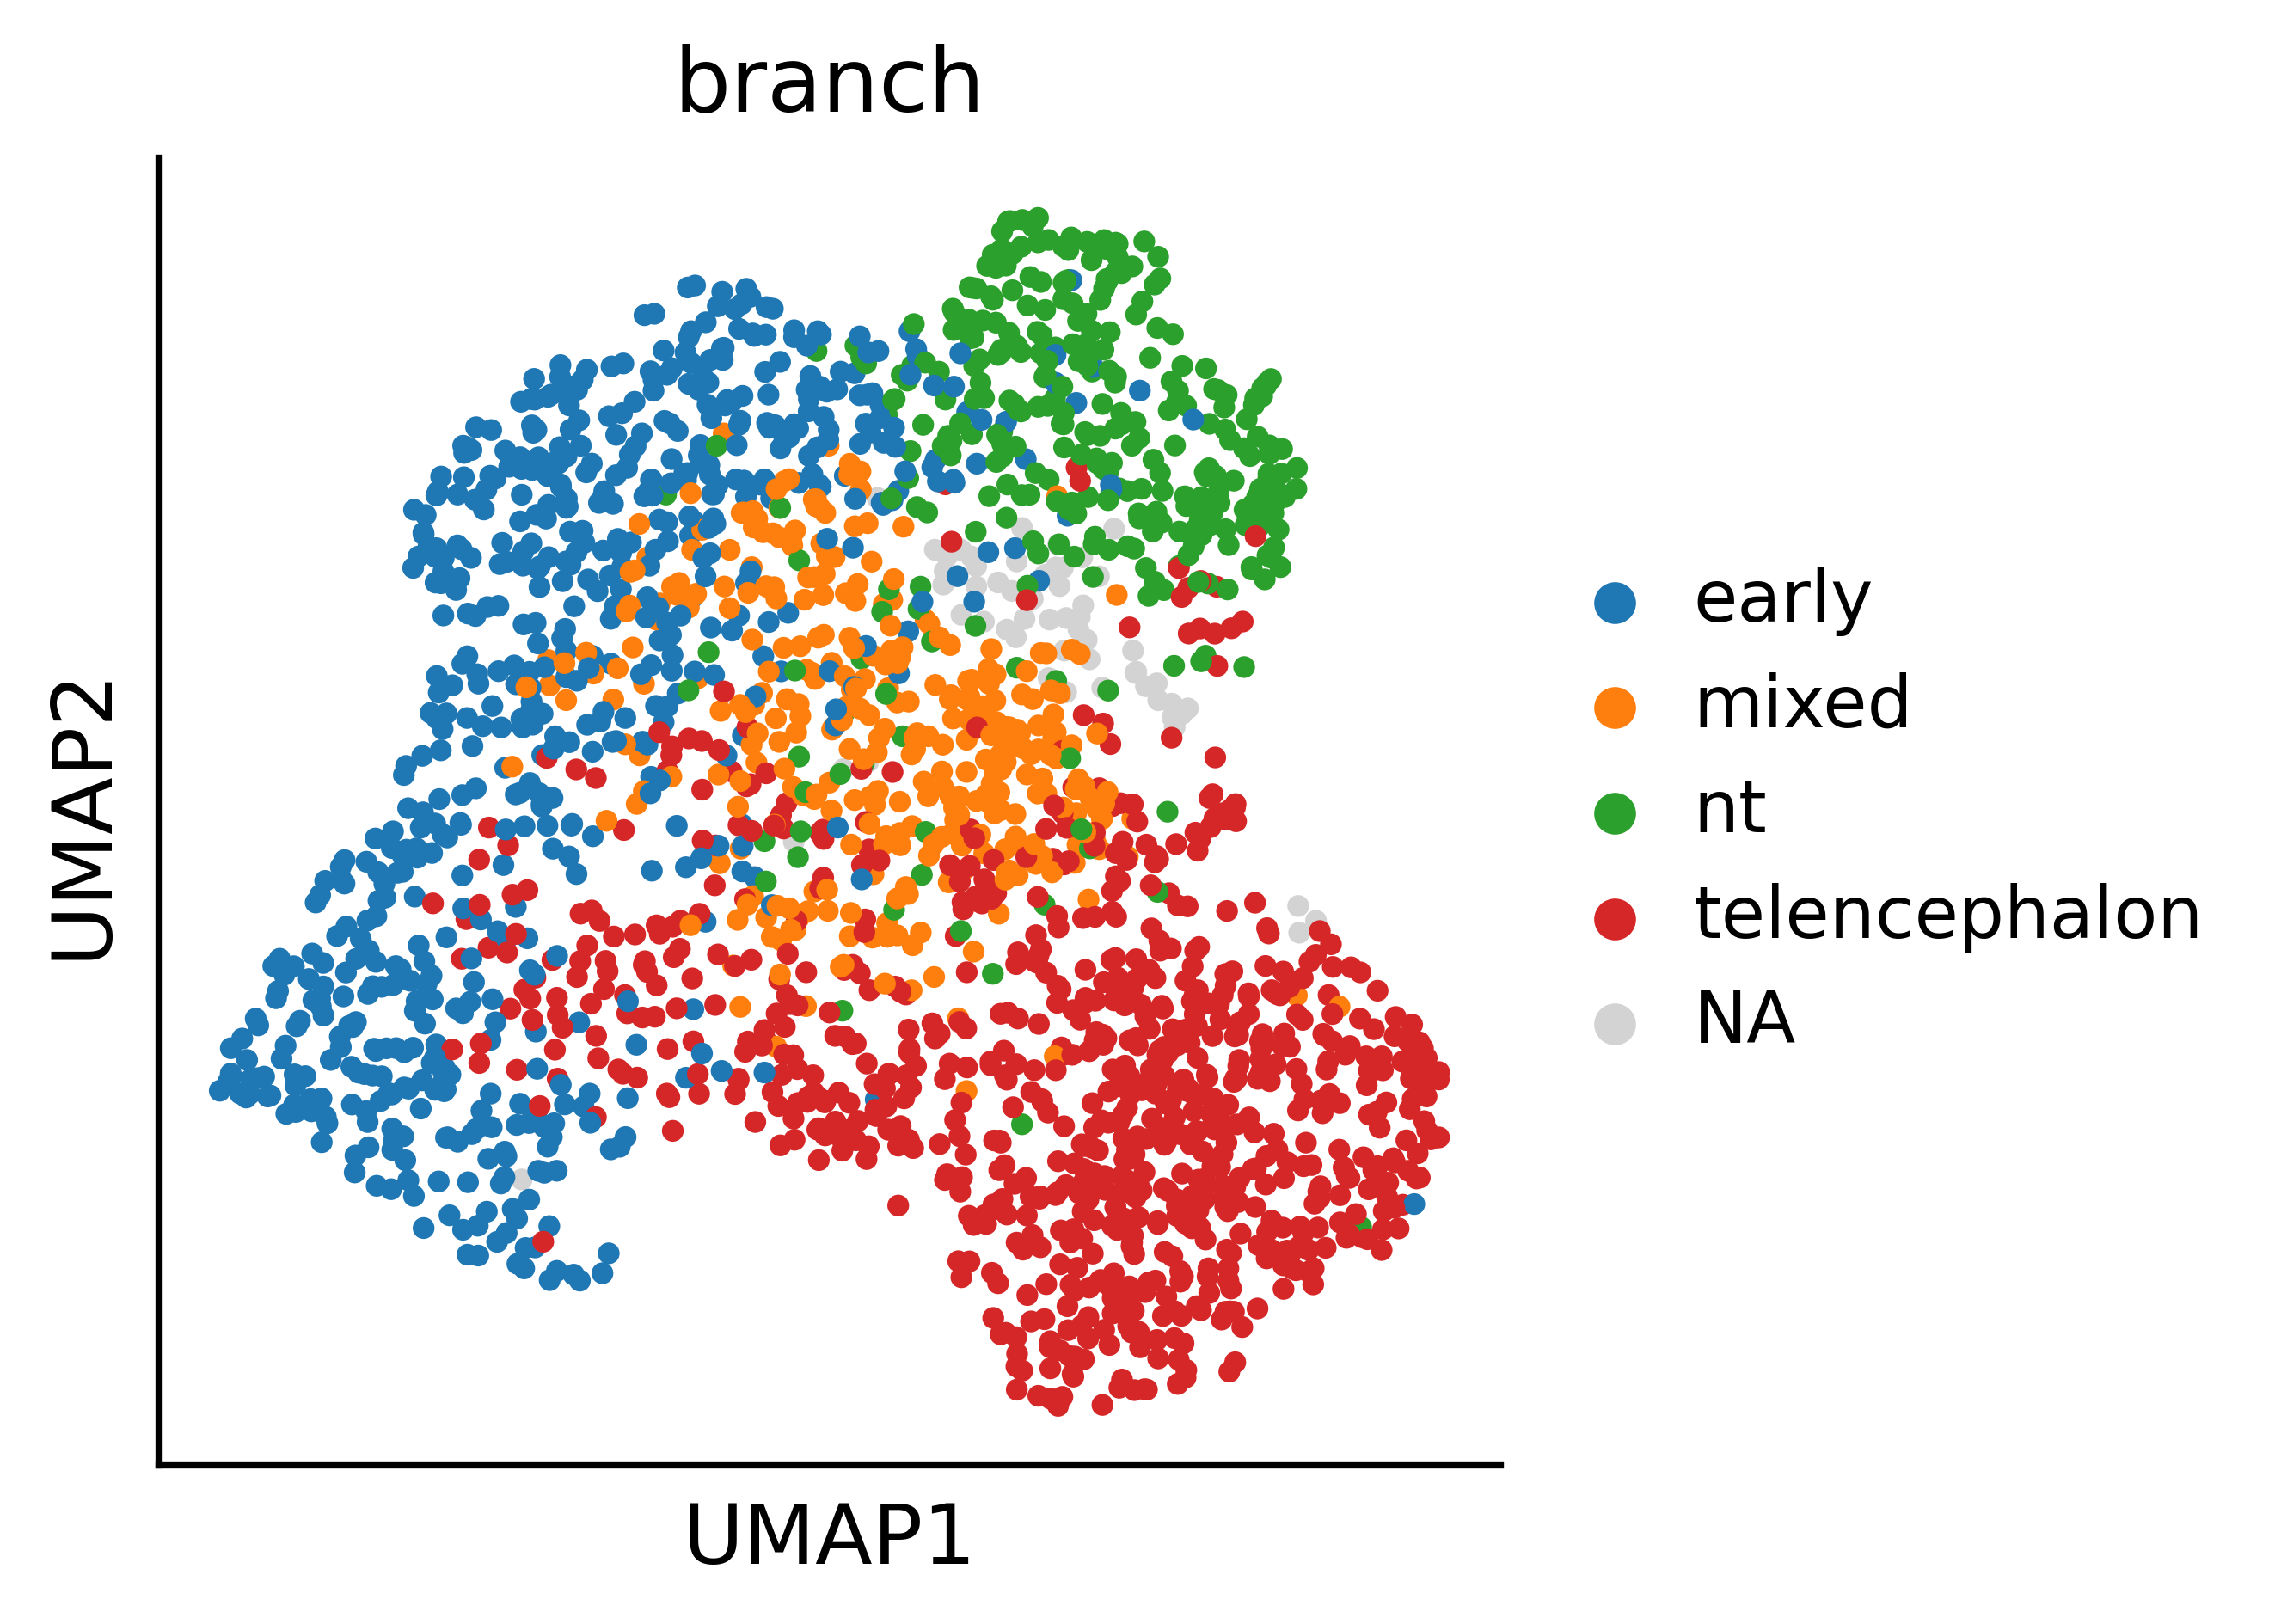

In [6]:
fig = sc.pl.umap(adata_rna_test, color="branch", return_fig=True)

In [7]:
fig.savefig(os.path.join(fig_output_dir, "rna_scvi_umap.png"))

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


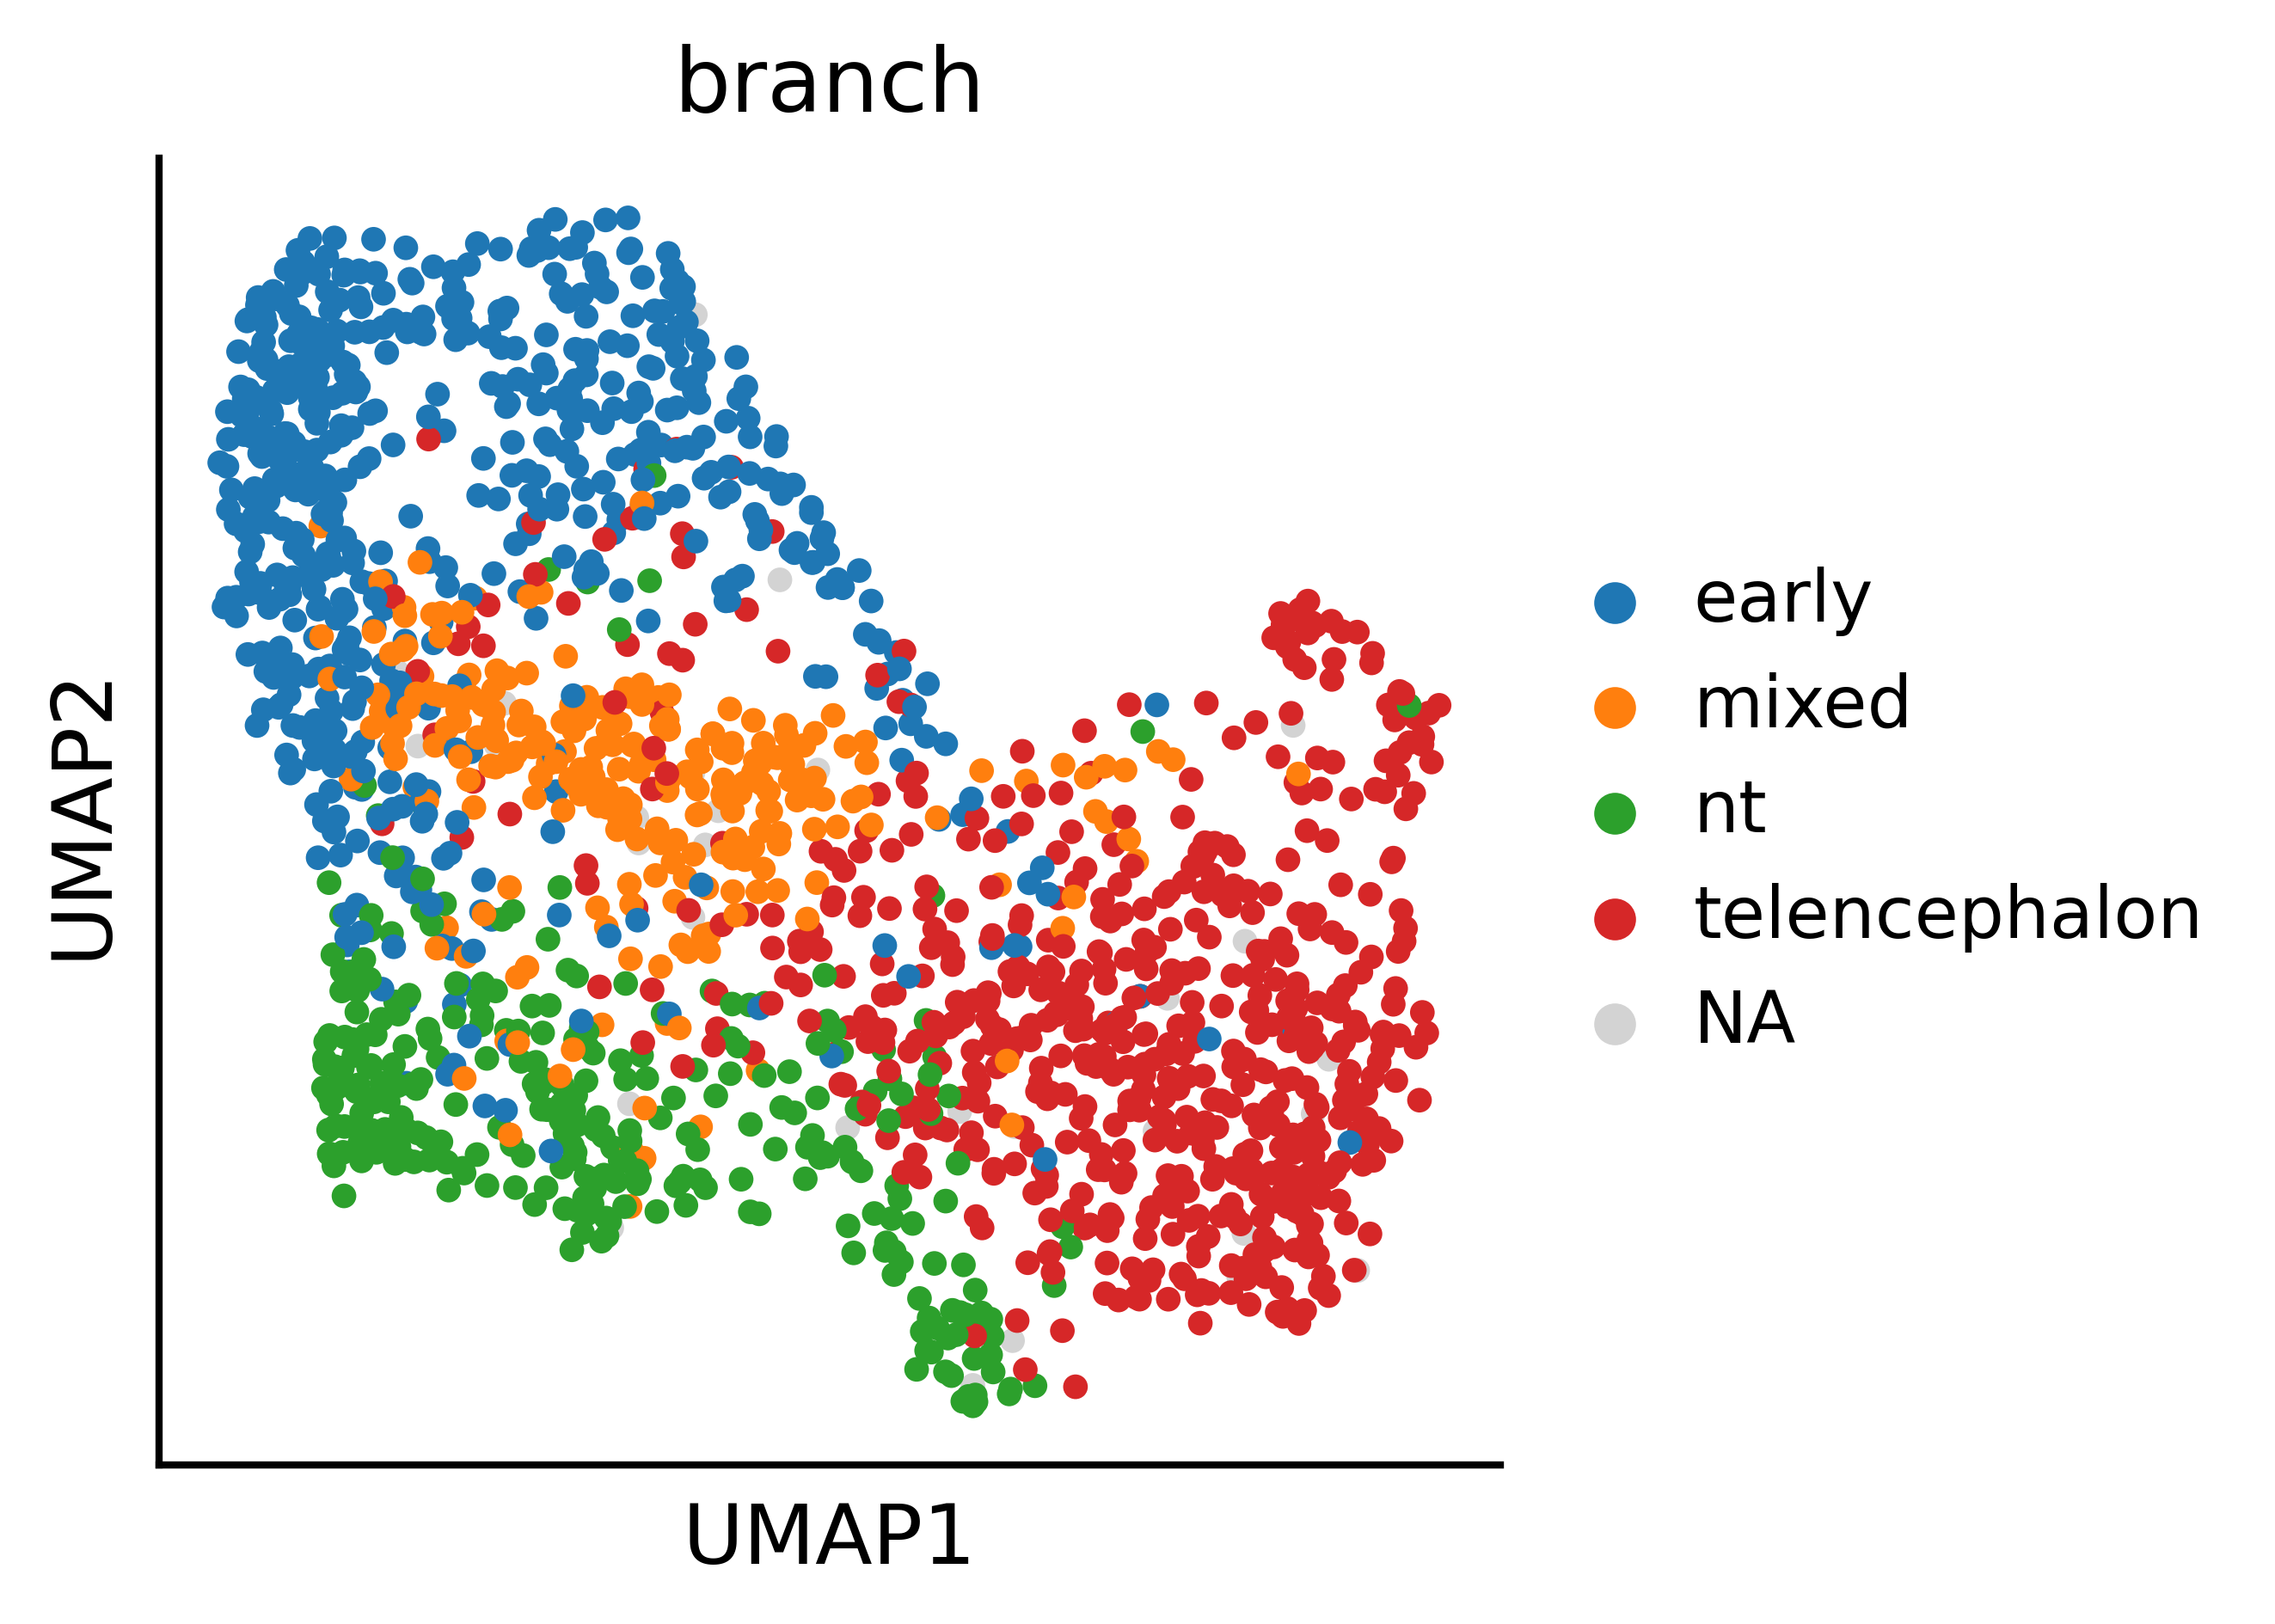

In [8]:
fig = sc.pl.umap(adata_atac_test, color="branch", return_fig=True)

In [9]:
fig.savefig(os.path.join(fig_output_dir, "atac_peakvi_umap.png"))

In [10]:
adata_atac = anndata.concat((adata_src_atac_test, adata_atac_test), label="perturbation", keys=["unperturbed", "perturbed"])

In [11]:
sc.pp.neighbors(adata_atac, use_rep="X_pca")
sc.tl.umap(adata_atac)

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


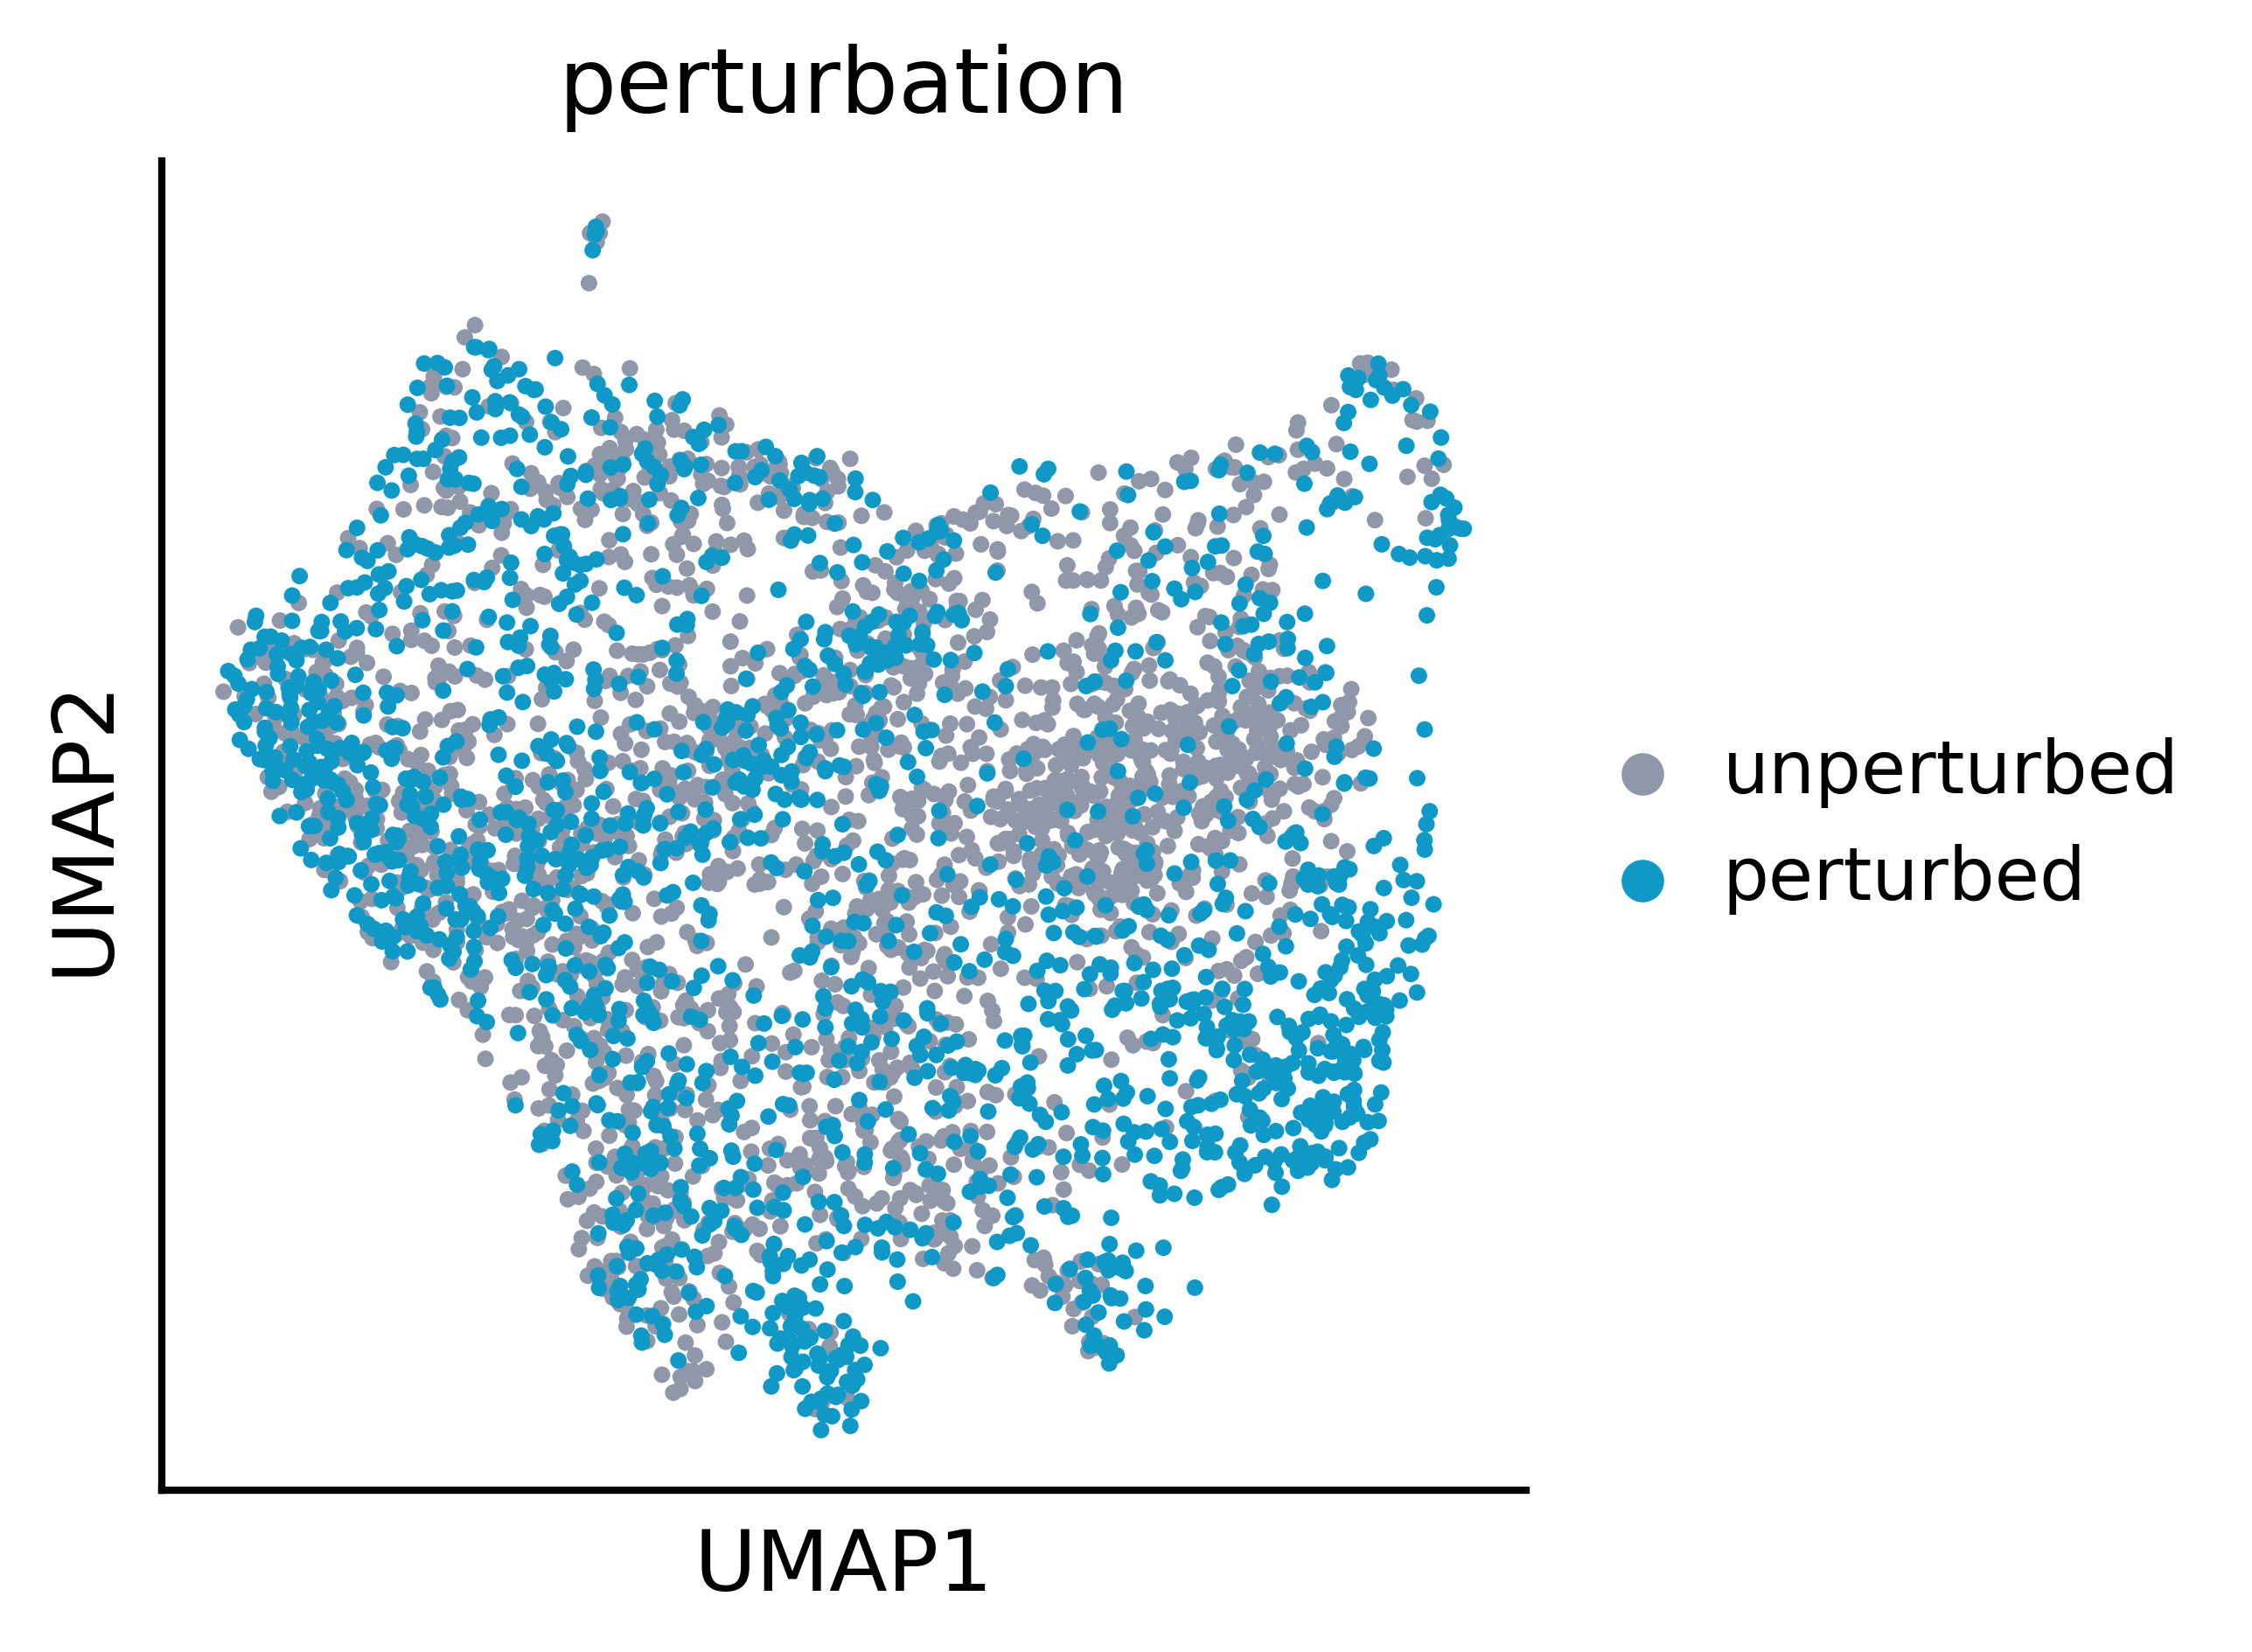

In [12]:
fig = sc.pl.umap(adata_atac, color="perturbation", palette=[source_col, target_col])

In [13]:
fig.savefig(os.path.join(fig_output_dir, "atac_unperturbed_perturbed_umap.png")), return_fig=True)

SyntaxError: unmatched ')' (3255291267.py, line 1)

In [ ]:
fig = sc.pl.umap(adata_atac, color=["branch"], return_fig=True)

In [ ]:
fig.savefig(os.path.join(fig_output_dir, "atac_unperturbed_perturbed_umap_cell_type.png"))

In [ ]:
sc.pl.umap(adata_atac, color=["seurat_clusters"], return_fig=True)

In [ ]:
fig.savefig(os.path.join(fig_output_dir, "atac_unperturbed_perturbed_cluster_umap.png")))

In [ ]:
sc.pl.umap(adata_atac, color=["seurat_clusters"], groups=["0", "2"], return_fig=True)

In [ ]:
fig.savefig(os.path.join(fig_output_dir, "atac_two_clusters.png"))